In [1]:
import pandas as pd

In [2]:
mt_result_df = pd.read_csv(
    "/Users/lujun.li/projects/causallm-github/causalllm/resource/output/MT/exp_result_Llama-2-70b-chat-hf_20240520172855_928055.csv"
)

In [3]:
def extract_final_response(row):
    prompt = row[match_prompt_column(row)]
    response = row["generated_response"]
    return response[len(prompt) :]


def match_prompt_column(row):
    if "Llama-2" in row["model"]:
        return "llama2_chat_initial_prompt"
    elif "Mixtral" in row["model"] or "Mistral" in row["model"]:
        return "mixtral_instruct_initial_prompt"
    elif "Llama-3" in row["model"]:
        return "llama3_chat_initial_prompt"
    else:
        print("The model name didn't match anything, please check!!!!")
        return None


mt_result_df["generated_response_pure"] = mt_result_df.apply(
    extract_final_response, axis=1
)
# sample_results = mt_result_df[
#     (mt_result_df["dataset_name"] == "ind_Latn") & (mt_result_df["id"] == 1)
# ]

# Calculate Spbleu for the sample results

In [4]:
from sacrebleu.metrics import BLEU

bleu = BLEU(tokenize="flores101", effective_order=True)
sys = mt_result_df.generated_response_pure.to_list()
refs = mt_result_df.sentence_target.to_list()

result = bleu.sentence_score(hypothesis=sys[0], references=[refs[0]]).score


def calculate_sp_bleu(row):
    reference = row["sentence_target"]
    generated_answer = row["generated_response_pure"]
    score = bleu.sentence_score(
        hypothesis=generated_answer, references=[reference]
    ).score
    return score


mt_result_df["spbleu"] = mt_result_df.apply(calculate_sp_bleu, axis=1)

In [6]:
mt_result_df.to_csv(
    "/Users/lujun.li/projects/causallm-github/causalllm/resource/output/MT/exp_result_Llama-2-70b-chat-hf_sp_bleu.csv",
    index=False,
)

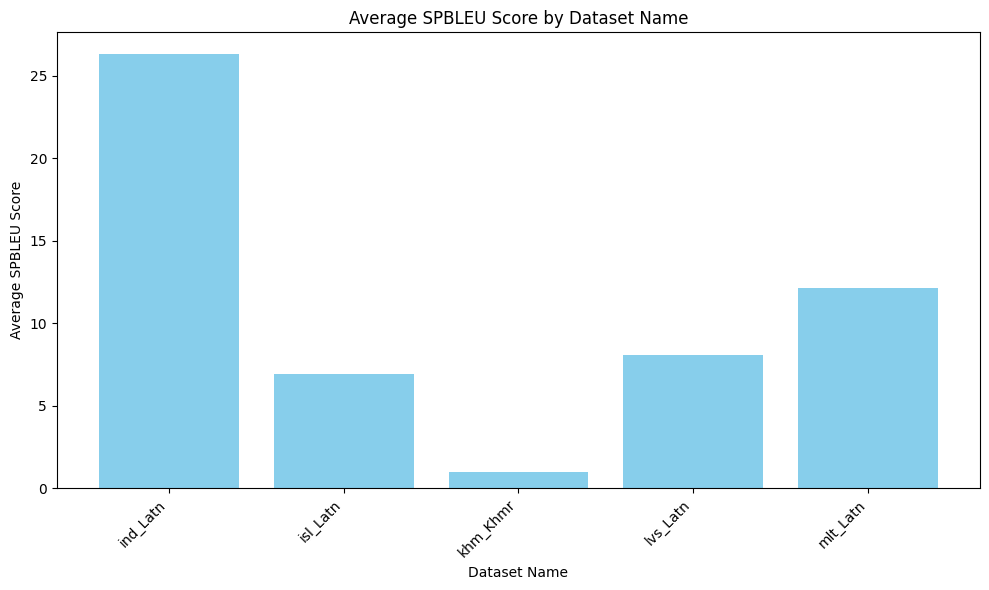

In [6]:
import matplotlib.pyplot as plt

grouped_results = mt_result_df.groupby("dataset_name")["spbleu"].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(grouped_results["dataset_name"], grouped_results["spbleu"], color="skyblue")
plt.xlabel("Dataset Name")
plt.ylabel("Average SPBLEU Score")
plt.title("Average SPBLEU Score by Dataset Name")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

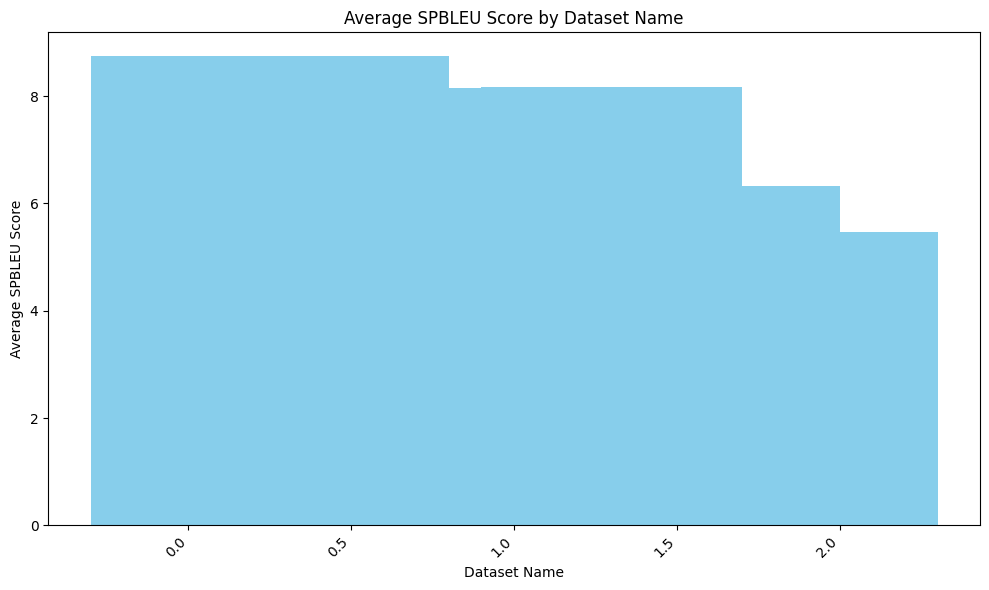

In [26]:
import matplotlib.pyplot as plt

grouped_results = mt_result_df.groupby("Temperature")["spbleu"].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(grouped_results["Temperature"], grouped_results["spbleu"], color="skyblue")
plt.xlabel("Dataset Name")
plt.ylabel("Average SPBLEU Score")
plt.title("Average SPBLEU Score by Dataset Name")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
#

# Started Causal Analysis